In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv

## 폰트 관련

In [3]:
import os
from matplotlib import font_manager as fm

font_file = "../폰트 파일/NanumGothic.ttf"
fm.fontManager.addfont(font_file)

if os.name == 'posix':
    # plt.rcParams['font.family'] = 'NanumGothic'
    plt.rc('font', family='NanumGothic')
elif os.name == 'nt': 
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False)
# plt.rcParams['axes.unicode_minus'] = False

%config InlineBackend.figure_format = 'retina'

# 서울시 버스노선별 정류장별 승하차 인원 정보.csv

Empty DataFrame
Columns: [노선번호, 표준버스정류장ID, 역명, 승차총승객수, 하차총승객수, 등록일자, color]
Index: []


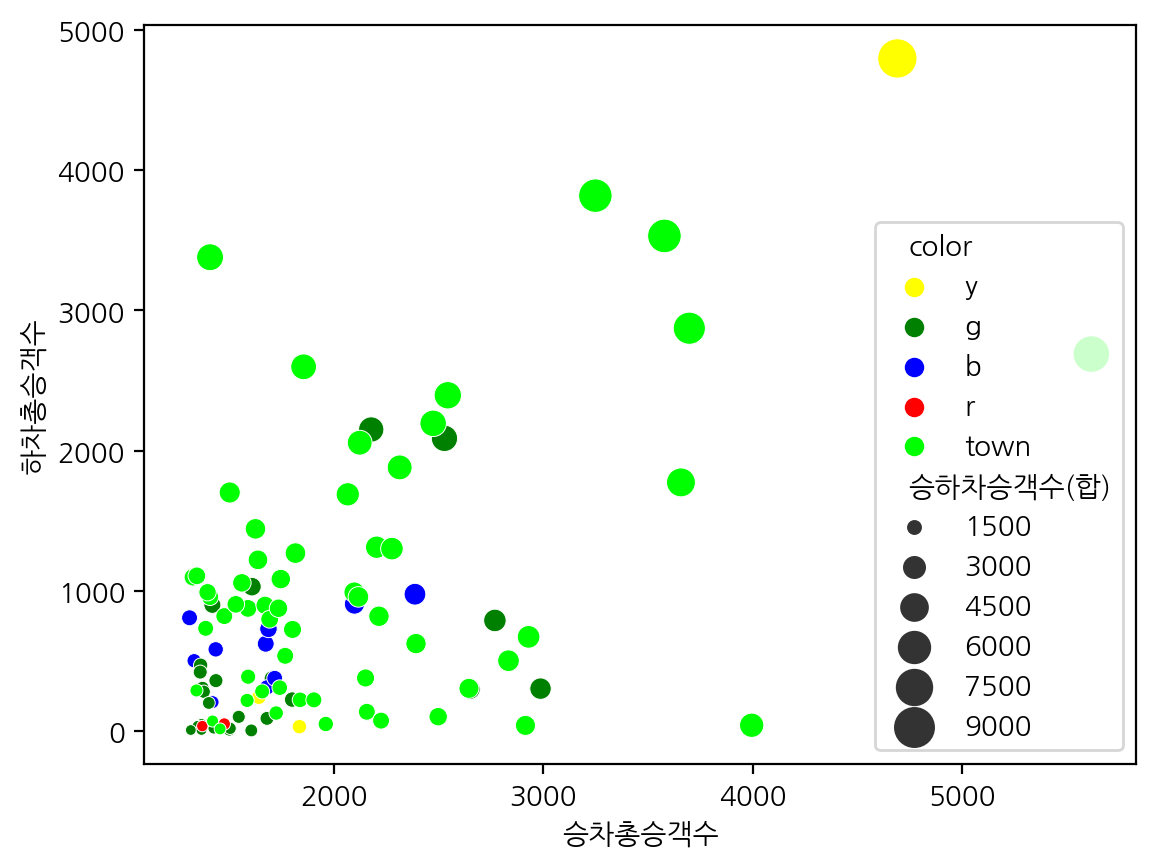

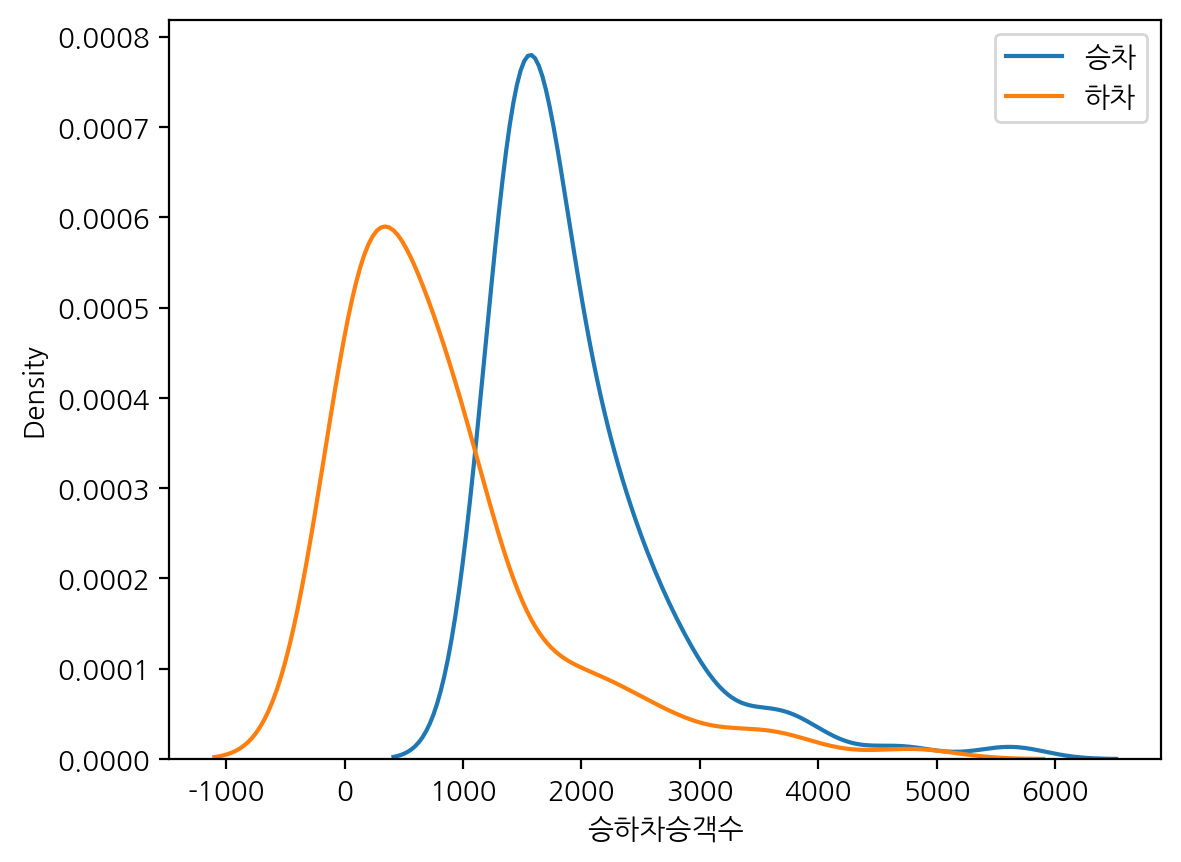

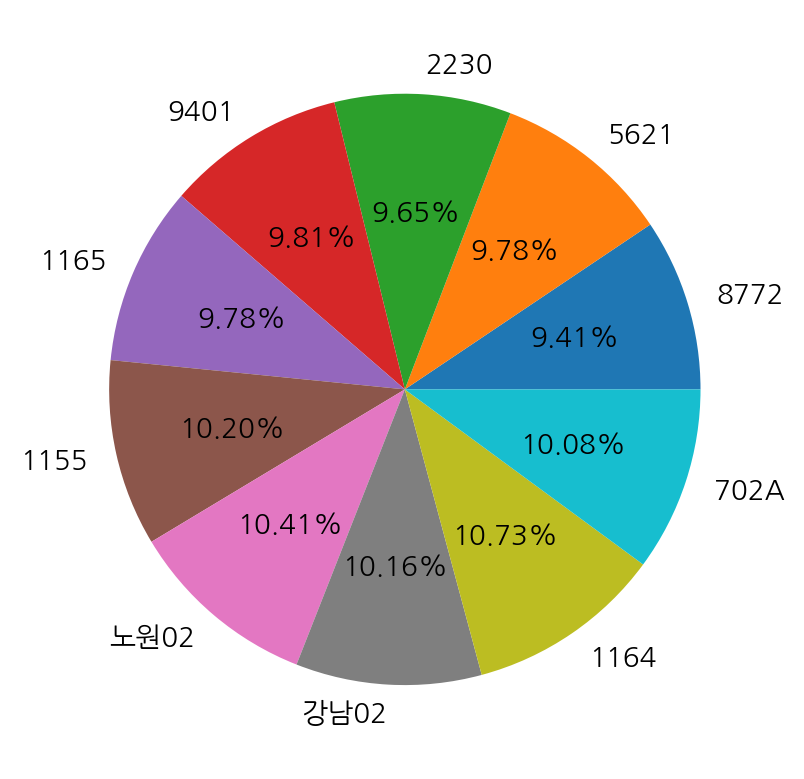

In [6]:
with open("../참고 데이터/csv/large-datasets/서울시 버스노선별 정류장별 승하차 인원 정보.csv", encoding="cp949") as f:
    data = pd.read_csv(f)

trimmed = data.drop(columns=['사용일자','노선명','버스정류장ARS번호']).sort_values(by='승차총승객수')[::-1].drop_duplicates(subset=['표준버스정류장ID']).head(100) #.loc[(trimmed["승차총승객수"] < 1000)]

trimmed = trimmed.sort_values("노선번호")

trimmed.loc[(trimmed['노선번호'].str.len() == 2) &
            (trimmed['노선번호'].str.isdecimal() == True), 'color'] = 'y'

trimmed.loc[(trimmed["노선번호"].str.len() <= 3) & (trimmed["노선번호"].str.len() > 2),
            'color'] = 'b'

trimmed.loc[(trimmed["노선번호"].str.len() == 4)
            & (trimmed['노선번호'].str.isalnum() == True) &
            (trimmed['노선번호'].str.isdecimal() == True), 'color'] = 'g'

trimmed.loc[(trimmed["노선번호"].str.startswith('9')), 'color'] = 'r'

night_buses = trimmed.loc[(trimmed['노선번호'].str.contains('N'))]
print(night_buses)

# 전체 25개의 자치구 중 중구, 송파구를 제외한 23개의 자치구에 마을버스가 운행하고 있다
trimmed.loc[trimmed['노선번호'].str.contains(
    '금천|종로|용산|구로|도봉|강북|중랑|양천|영등포|강동|성동|동대문|서대문|광진|은평|마포|동작|강서|노원|성북|서초|관악|강남',
    case=False), 'color'] = 'town'

colors = {
    'NaN': 'black',
    'town': 'lime',
    'g': 'green',
    'r': 'red',
    'b': 'blue',
    'y': 'yellow'
}
trimmed['승하차승객수(합)'] = trimmed['승차총승객수'] + trimmed['하차총승객수']
sns.scatterplot(trimmed, x='승차총승객수',y='하차총승객수', size='승하차승객수(합)',
                             palette=colors, hue='color', sizes=(15,200), legend=True)
plt.show()

sns.kdeplot(data=trimmed['승차총승객수'],label='승차')
sns.kdeplot(data=trimmed['하차총승객수'],label='하차')
plt.xlabel("승하차승객수")
plt.legend()
plt.show()

topt = trimmed.sort_values("승하차승객수(합)")
plt.pie(topt.head(10)['승차총승객수'], labels=topt.head(10)['노선번호'], autopct="%.2f%%")
plt.show()